# Final Project: Microplastics Source Identification

## December 4, 2023


### By: Amulya Nagella

Data Source: https://www.ncei.noaa.gov/products/microplastics

### Importing necessary Packages

Xarry was the imported package that was not used within this data analysis.

In [17]:
#Importing all the necessary packages

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

### Reading in the Data

This data was sourced from NOAA's Marine Microplastics website and was filtered to only include data values from the 21st century (January-01-2000 to December-31-2022).

Note: There is no data for 2023 uploaded into the site yet.

In [18]:
# Reading in the data file as a pandas dataframe

df = pd.read_csv('/home/an691/rcaes/final_project_AmulyaNagella/MarineMicroplastics_2000-22.csv', parse_dates=['Date'])
df

/tmp/ipykernel_48055/493698415.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/home/an691/rcaes/final_project_AmulyaNagella/MarineMicroplastics_2000-22.csv', parse_dates=['Date'])


,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Sediment Sample Depth (m),Transect Number,Sampling Point on Beach,Volunteers Number,Collecting Time (min),State,Country,Marine Setting,x,y
0,96165,2011-01-22,-29.948200,-20.712000,Atlantic Ocean,NaN,NaN,1.084698,pieces/m3,1-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-2.305649e+06,-3.496893e+06
1,91256,2007-05-18,3.480000,-143.620000,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.598771e+07,3.876302e+05
2,93248,2012-11-17,4.410000,-145.740000,Pacific Ocean,NaN,NaN,0.001596,pieces/m3,0.0005-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.622370e+07,4.914044e+05
3,97754,2018-10-20,3.652681,-49.193139,Atlantic Ocean,NaN,NaN,703.000000,pieces/m3,>=10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-5.476155e+06,4.068903e+05
4,92513,2002-03-21,20.570000,-155.540000,Pacific Ocean,NaN,NaN,0.002160,pieces/m3,0.0005-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.731463e+07,2.340679e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16425,90568,2001-07-06,34.560000,-66.130000,Atlantic Ocean,NaN,NaN,0.030236,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-7.361558e+06,4.104247e+06
16426,92993,2015-07-14,73.626500,-81.362900,Arctic Ocean,Northwestern Passages,NaN,0.030000,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-9.057277e+06,1.236639e+07
16427,88759,2007-02-18,25.630000,-76.980000,Atlantic Ocean,NaN,NaN,0.021600,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.569374e+06,2.953327e+06
16428,104245,2021-06-05,29.655200,-95.007800,Atlantic Ocean,Gulf of Mexico,NaN,NaN,pieces/10 mins,40-200,...,NaN,NaN,NaN,4.0,10.0,Texas,United States,Beach-Nurdle Patrol,-1.057622e+07,3.459306e+06


### 1. Plotting Maps Over the Past Decade.

Purpose: These maps can show the progression of microplastic pollution over the years.

Process: First, extract data from every 7-8 years within the dataframe and create sub-dataframes, this includes data from 2000, 2008, 2016, and 2022. Next, each yearly map is plotted into the world map by using the recorded microplastic measurement as classification for points on the four maps. Another set of 4 maps were created by usign the density class as classification instead.

In [19]:
#Extracting data from every 8-7 years.

df_2000 = df[df['Date'].dt.year == 2000][['Latitude', 'Longitude', 'Measurement', 'Density Class']]

df_2008 = df[df['Date'].dt.year == 2008][['Latitude', 'Longitude', 'Measurement', 'Density Class']]

df_2016 = df[df['Date'].dt.year == 2016][['Latitude', 'Longitude', 'Measurement', 'Density Class']]

df_2022 = df[df['Date'].dt.year == 2022][['Latitude', 'Longitude', 'Measurement', 'Density Class']]

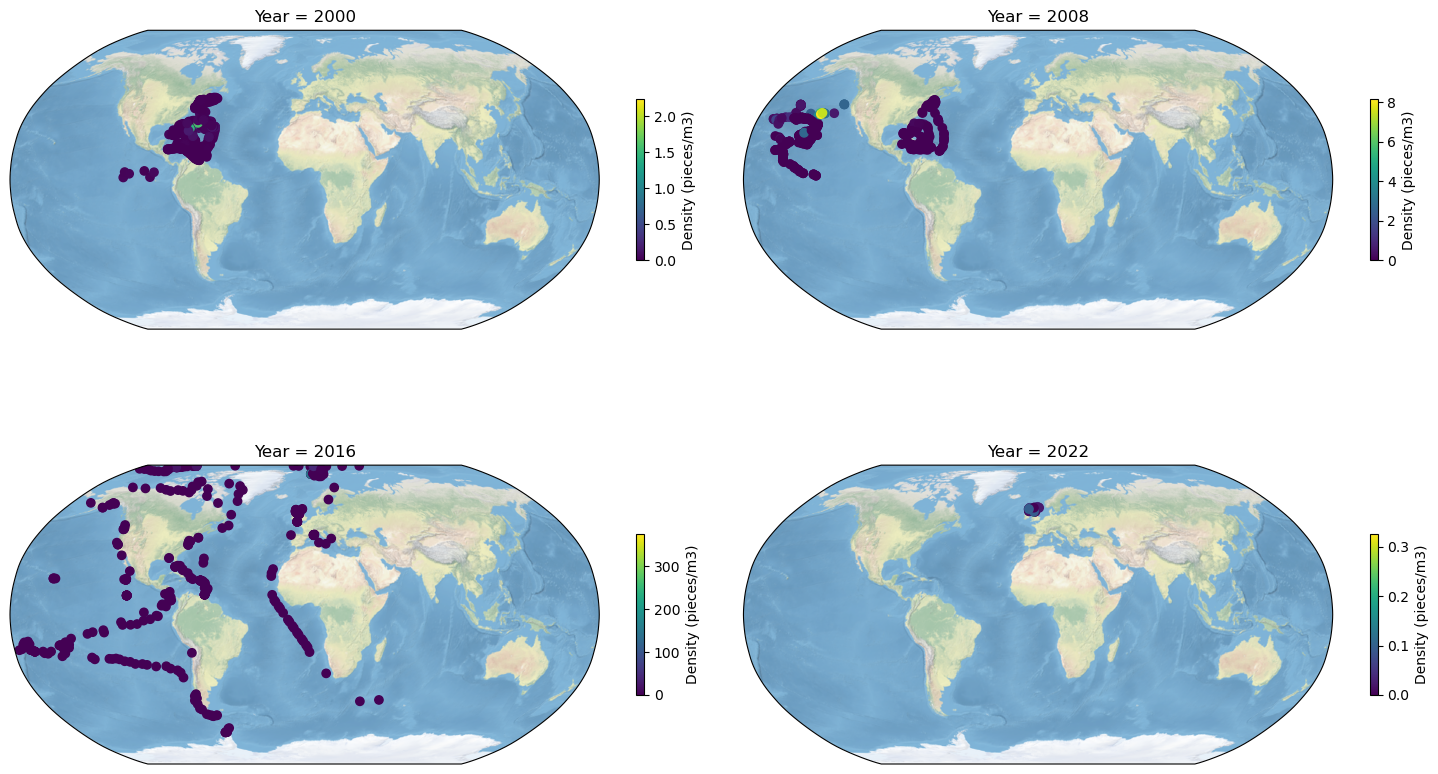

In [20]:
# Plotting all the datasets into individual maps.

fig, axes = plt.subplots(2, 2, figsize=(15, 10), subplot_kw={'projection':ccrs.Robinson()})

#Year=2000 Map
ax = axes[0,0]
ax.stock_img()
scatter_2000 = ax.scatter(df_2000['Longitude'], df_2000['Latitude'], transform=ccrs.PlateCarree(), c=df_2000['Measurement'])

ax.set_title('Year = 2000')
colorbar_2000 = plt.colorbar(scatter_2000, ax=ax, label='Density (pieces/m3)', shrink=0.3)


#2008
ax = axes[0,1]
ax.stock_img()
scatter_2008 = ax.scatter(df_2008['Longitude'], df_2008['Latitude'], transform=ccrs.PlateCarree(), c=df_2008['Measurement'])

ax.set_title('Year = 2008')
colorbar_2008 = plt.colorbar(scatter_2008, ax=ax, label='Density (pieces/m3)', shrink=0.3)

#2016
ax = axes[1,0]
ax.stock_img()
scatter_2016 = ax.scatter(df_2016['Longitude'], df_2016['Latitude'], transform=ccrs.PlateCarree(), c=df_2016['Measurement'])

ax.set_title('Year = 2016')
colorbar_2016 = plt.colorbar(scatter_2016, ax=ax, label='Density (pieces/m3)', shrink=0.3)


#2022
ax = axes[1,1]
ax.stock_img()
scatter_2022 = ax.scatter(df_2022['Longitude'], df_2022['Latitude'], transform=ccrs.PlateCarree(), c=df_2022['Measurement'])

ax.set_title('Year = 2022')
colorbar_2022 = plt.colorbar(scatter_2022, ax=ax, label='Density (pieces/m3)', shrink=0.3)


plt.tight_layout()
plt.show()

/tmp/ipykernel_48055/3270556453.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(categories))


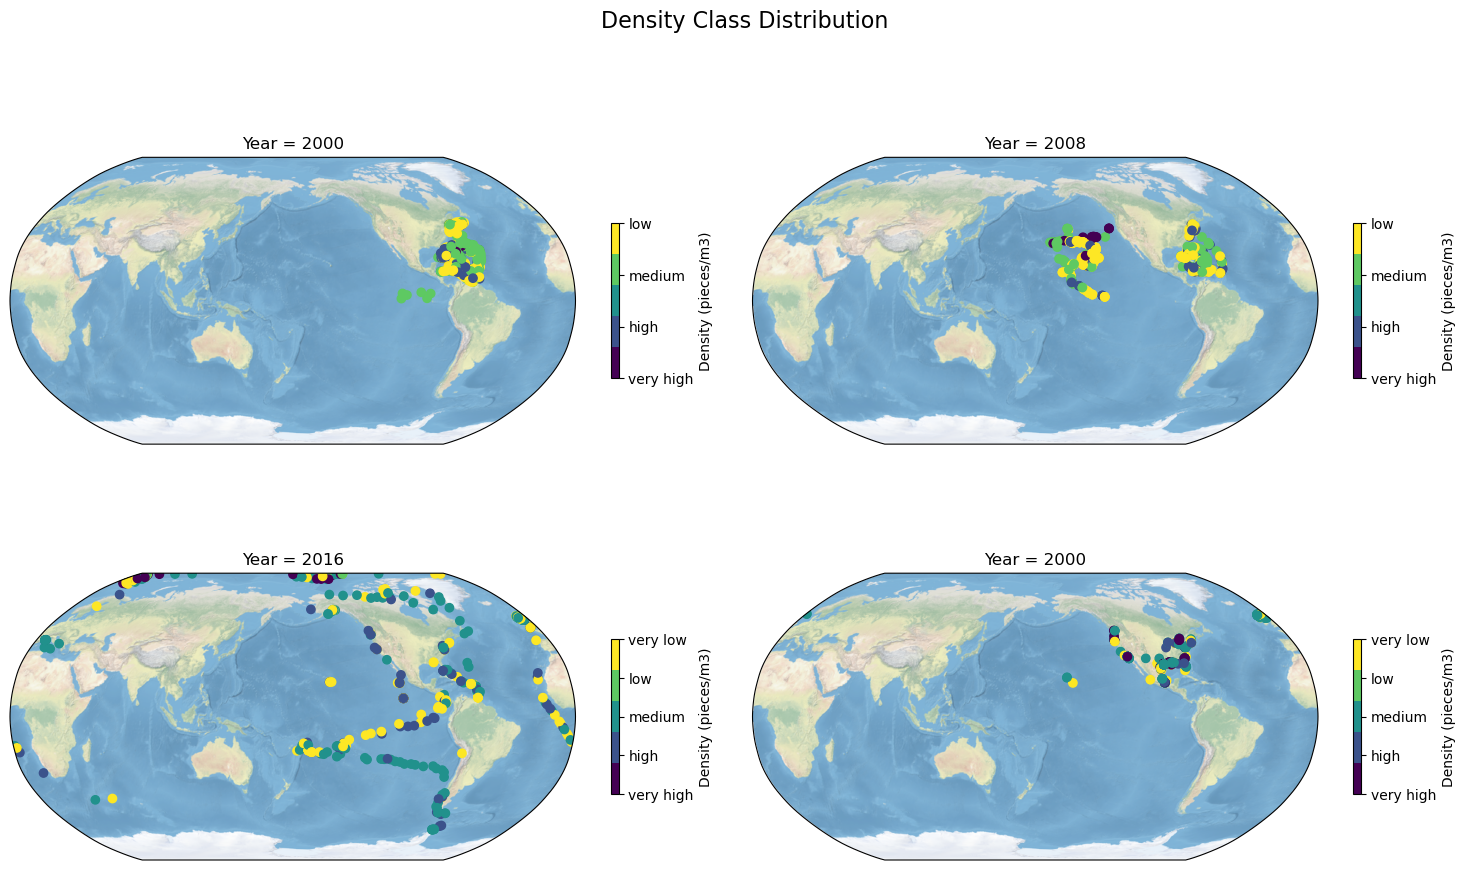

In [21]:
#There are 5 categories within the density class parameter. The code below creates a color map based on the categories.
categories = ['very high', 'high', 'medium', 'low', 'very low']
colormap = plt.cm.get_cmap('viridis', len(categories))

norm = mcolors.BoundaryNorm(range(len(categories) + 1), colormap.N)

#Below, the colormap based ont he 5 categories is applied to the density class column within each of the sub-datasets.
df_2000['Density Class'] = df_2000['Density Class'].astype('category')
df_2008['Density Class'] = df_2008['Density Class'].astype('category')
df_2016['Density Class'] = df_2016['Density Class'].astype('category')
df_2022['Density Class'] = df_2022['Density Class'].astype('category')

#Now, we can create the four maps for the four different marine settings.

# "cat.codes" function converts the categorical values into numeric codes. The colormap created above is used to map the codes to colors for all the maps.


fig, axes = plt.subplots(2, 2, figsize=(15, 10), subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('Density Class Distribution', fontsize=16)


#2000 Map
ax = axes[0,0]
ax.stock_img()
scatter_2000 = ax.scatter(df_2000['Longitude'], df_2000['Latitude'], transform=ccrs.PlateCarree(), 
                           c=norm(df_2000['Density Class'].cat.codes), cmap=colormap)

ax.set_title('Year = 2000')
colorbar_2000 = plt.colorbar(scatter_2000, ax=ax, label='Density (pieces/m3)', shrink=0.3, 
                             ticks=range(len(categories)))
colorbar_2000.set_ticklabels(categories)


#2008 Map
ax = axes[0,1]
ax.stock_img()
scatter_2008 = ax.scatter(df_2008['Longitude'], df_2008['Latitude'], transform=ccrs.PlateCarree(),
                           c=norm(df_2008['Density Class'].cat.codes), cmap=colormap)

ax.set_title('Year = 2008')
colorbar_2008 = plt.colorbar(scatter_2008, ax=ax, label='Density (pieces/m3)', shrink=0.3, 
                               ticks=range(len(categories)))
colorbar_2008.set_ticklabels(categories)


#2016 Map
ax = axes[1,0]
ax.stock_img()
scatter_2016 = ax.scatter(df_2016['Longitude'], df_2016['Latitude'], transform=ccrs.PlateCarree(),
                              c=norm(df_2016['Density Class'].cat.codes), cmap=colormap)

ax.set_title('Year = 2016')
colorbar_2016 = plt.colorbar(scatter_2016, ax=ax, label='Density (pieces/m3)', shrink=0.3, 
                             ticks=range(len(categories)))
colorbar_2016.set_ticklabels(categories)


#2022 Map
ax = axes[1,1]
ax.stock_img()
scatter_2022 = ax.scatter(df_2022['Longitude'], df_2022['Latitude'], transform=ccrs.PlateCarree(),
                             c=norm(df_2022['Density Class'].cat.codes), cmap=colormap)

ax.set_title('Year = 2000')
colorbar_2022 = plt.colorbar(scatter_2022, ax=ax, label='Density (pieces/m3)', shrink=0.3, ticks=range(len(categories)))
colorbar_2022.set_ticklabels(categories)


plt.tight_layout()
plt.show()

### 2. Mapping by Marine Setting

The maps below indicate the microplastic density ranges by beach locations, beach nurdle-patrole locations, ocean sdiment, and ocean surface water locations. The locations indicate data recordings from 2000 to 2022.

Purpose: Creating seperate maps for each maraine setting can provide more information on how far the microplastic particles are travelling from the coastal areas (or beach areas).

Process: Creating seperate subset dataframes for each type of marine setting in the data. Then, mapping each of the dataframes using the density class as the classification for the points on the map.

In [24]:
# Extracting all the different marine settings subset dataframes and the according latitude, longitude, and data range/class parameters for mapping.

df_beach = df[df['Marine Setting'] == 'Beach'][['Latitude', 'Longitude', 'Density Range', 'Density Class']]

df_nurdle = df[df['Marine Setting'] == 'Beach-Nurdle Patrol'][['Latitude', 'Longitude', 'Density Range', 'Density Class']]

df_sediment = df[df['Marine Setting'] == 'Ocean sediment'][['Latitude', 'Longitude', 'Density Range', 'Density Class']]

df_surface = df[df['Marine Setting'] == 'Ocean water'][['Latitude', 'Longitude', 'Density Range', 'Density Class']]

/tmp/ipykernel_48055/304338315.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(categories))


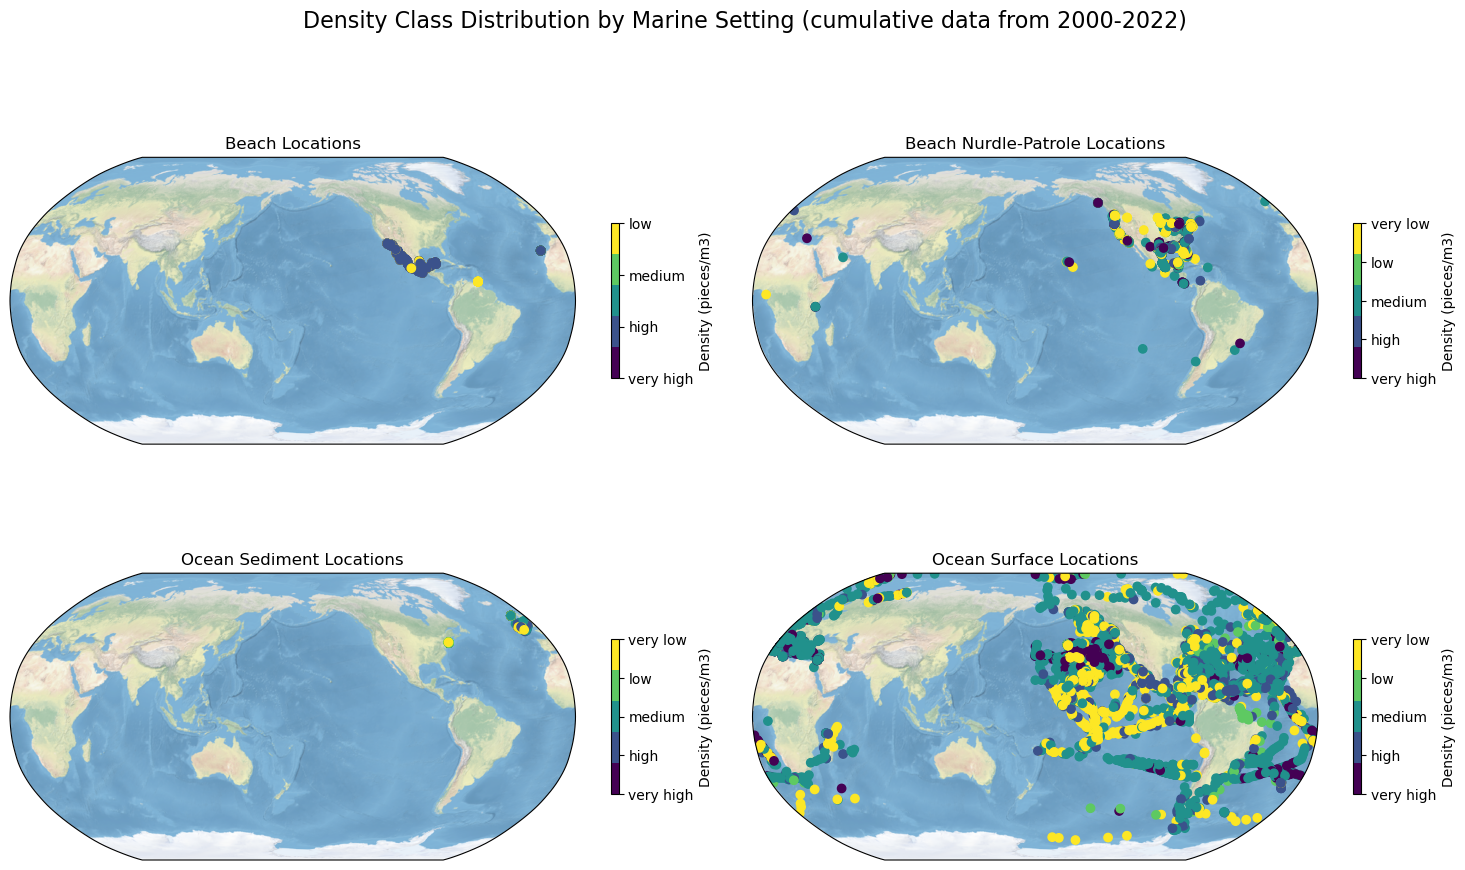

In [25]:
#There are 5 categories within the density class parameter. The code below creates a color map based on the categories.
categories = ['very high', 'high', 'medium', 'low', 'very low']
colormap = plt.cm.get_cmap('viridis', len(categories))

norm = mcolors.BoundaryNorm(range(len(categories) + 1), colormap.N)

#Below, the colormap based ont he 5 categories is applied to the density class column within each of the sub-datasets.
df_beach['Density Class'] = df_beach['Density Class'].astype('category')
df_nurdle['Density Class'] = df_nurdle['Density Class'].astype('category')
df_sediment['Density Class'] = df_sediment['Density Class'].astype('category')
df_surface['Density Class'] = df_surface['Density Class'].astype('category')

#Now, we can create the four maps for the four different marine settings.

# "cat.codes" function converts the categorical values into numeric codes. The colormap created above is used to map the codes to colors for all the maps.


fig, axes = plt.subplots(2, 2, figsize=(15, 10), subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('Density Class Distribution by Marine Setting (cumulative data from 2000-2022)', fontsize=16)


#Beach Map
ax = axes[0,0]
ax.stock_img()
scatter_beach = ax.scatter(df_beach['Longitude'], df_beach['Latitude'], transform=ccrs.PlateCarree(), 
                           c=norm(df_beach['Density Class'].cat.codes), cmap=colormap)

ax.set_title('Beach Locations')
colorbar_beach = plt.colorbar(scatter_beach, ax=ax, label='Density (pieces/m3)', shrink=0.3, ticks=range(len(categories)))
colorbar_beach.set_ticklabels(categories)


#Nurdle Patrole Map
ax = axes[0,1]
ax.stock_img()
scatter_nurdle = ax.scatter(df_nurdle['Longitude'], df_nurdle['Latitude'], transform=ccrs.PlateCarree(),
                           c=norm(df_nurdle['Density Class'].cat.codes), cmap=colormap)

ax.set_title('Beach Nurdle-Patrole Locations')
colorbar_nurdle = plt.colorbar(scatter_nurdle, ax=ax, label='Density (pieces/m3)', shrink=0.3, ticks=range(len(categories)))
colorbar_nurdle.set_ticklabels(categories)


#Ocean Sediment Map
ax = axes[1,0]
ax.stock_img()
scatter_sediment = ax.scatter(df_sediment['Longitude'], df_sediment['Latitude'], transform=ccrs.PlateCarree(),
                              c=norm(df_sediment['Density Class'].cat.codes), cmap=colormap)

ax.set_title('Ocean Sediment Locations')
colorbar_sediment = plt.colorbar(scatter_sediment, ax=ax, label='Density (pieces/m3)', shrink=0.3, ticks=range(len(categories)))
colorbar_sediment.set_ticklabels(categories)


#Ocean Surface Map
ax = axes[1,1]
ax.stock_img()
scatter_surface = ax.scatter(df_surface['Longitude'], df_surface['Latitude'], transform=ccrs.PlateCarree(),
                             c=norm(df_surface['Density Class'].cat.codes), cmap=colormap)

ax.set_title('Ocean Surface Locations')
colorbar_surface = plt.colorbar(scatter_surface, ax=ax, label='Density (pieces/m3)', shrink=0.3, ticks=range(len(categories)))
colorbar_surface.set_ticklabels(categories)


plt.tight_layout()
plt.show()

Comment on the maps above:

Most of the microplastics are recorded to be suspended with the ocean surface and do not flow into deep sections, as shown by the limited number of ocean sediment locations. The map also indicates that most of the microplastic pollution occurs by the coastal areas.

### 3. Finding the Total Microplastic Pollution by Ocean

Purpose: The bar graphs can provide more information about the areas that are the highest source of microplastic pollution.

Process: Here we create sub-dataframe that indicates the total or sum of microplastic measurements by the four different types of oceans. Then, the regular (or original sum data points) and the log scale points were plotted into a bar graph.


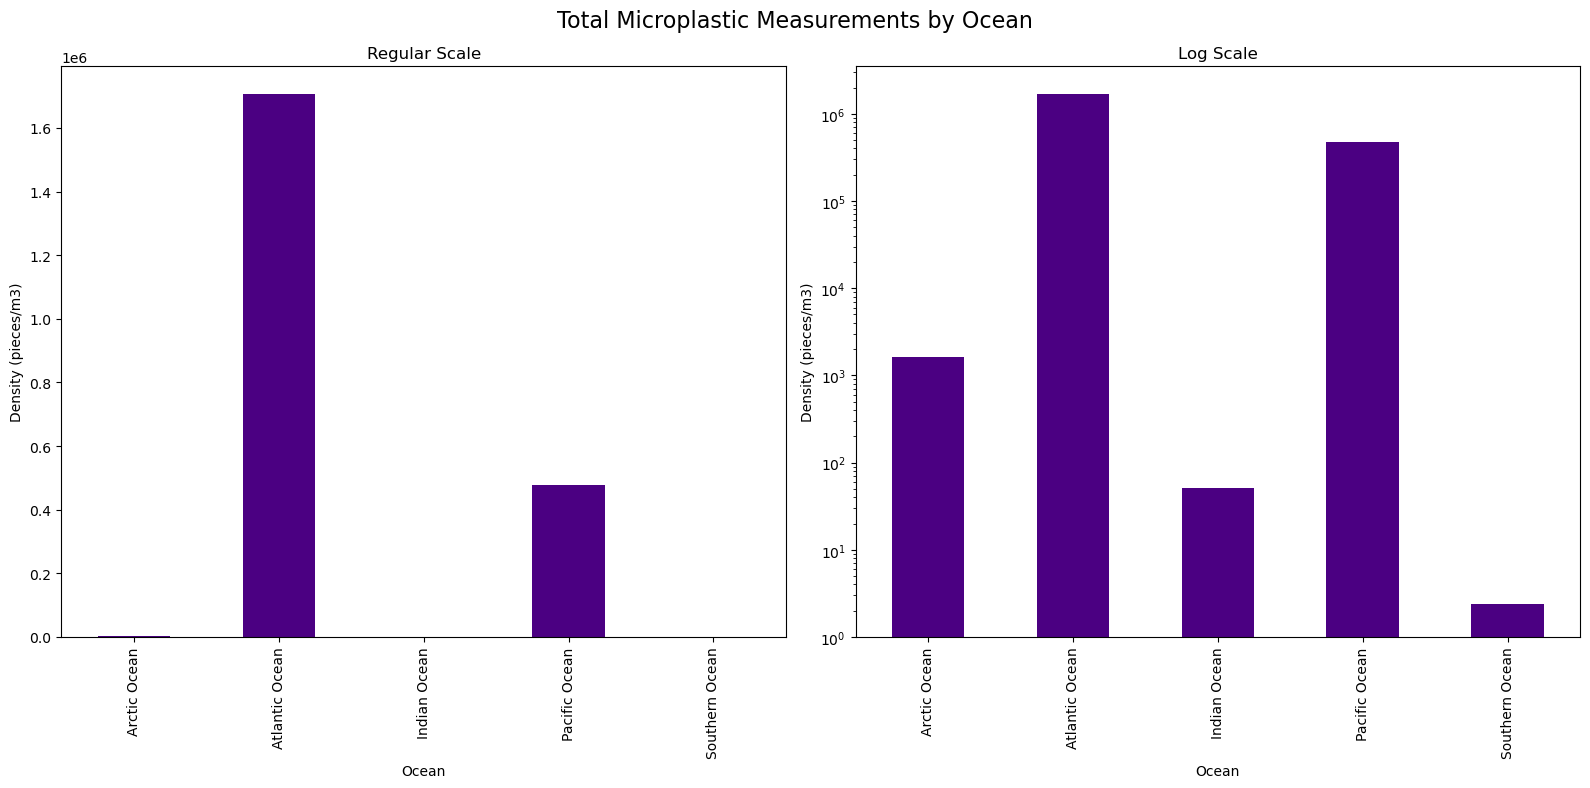

In [26]:
oceans_sum = df.groupby('Oceans')['Measurement'].sum()


# Create a subplot with two columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Regular plot
oceans_sum.plot(kind='bar', color='indigo', ax=axes[0])
axes[0].set_title('Regular Scale')
axes[0].set_xlabel('Ocean')
axes[0].set_ylabel('Density (pieces/m3)')

# Log plot
oceans_sum.plot(kind='bar', color='indigo', log=True, ax=axes[1])
axes[1].set_title('Log Scale')
axes[1].set_xlabel('Ocean')
axes[1].set_ylabel('Density (pieces/m3)')


fig.suptitle('Total Microplastic Measurements by Ocean', fontsize=16)

# Adjust layout to prevent overlapping


plt.tight_layout()

# Display the plot
plt.show()

### 4. Max Measurements by Ocean

Purpose: To see the difference in magnitude of maximum microplastic measurements in each ocean. (comparison of the maximum measurements by each ocean)

Process: Using the groupby and idxmax functions, the maximum measurement in each ocean was identified. These locations (along with their latitude and longitude numbers) were populated into a new subset dataframe called, "max_measurements". Then, all these locations are plotted into a worled map by using the measurements as a classification for the points on the map.

In [27]:
# Using the "loc", "groupby", and "idxmax" functions, the maximum recorded microplastics measurements in each of the oceans is identified within a sub-dataframe.

max_measurements = df.loc[df.groupby('Oceans')['Measurement'].idxmax()]

max_measurements_df = max_measurements[['Oceans', 'Measurement', 'Latitude', 'Longitude']]

max_measurements_df

,Oceans,Measurement,Latitude,Longitude
2455,Arctic Ocean,375.000000,80.562760,8.035110
16035,Atlantic Ocean,110480.000000,28.152519,-16.431790
2252,Indian Ocean,46.000000,-37.151900,22.507900
10909,Pacific Ocean,21156.558530,23.301153,-106.488458
10077,Southern Ocean,0.499663,-60.338800,-60.532500


Text(0.5, 1.0, 'Top Microplastics Measurements in each Ocean')

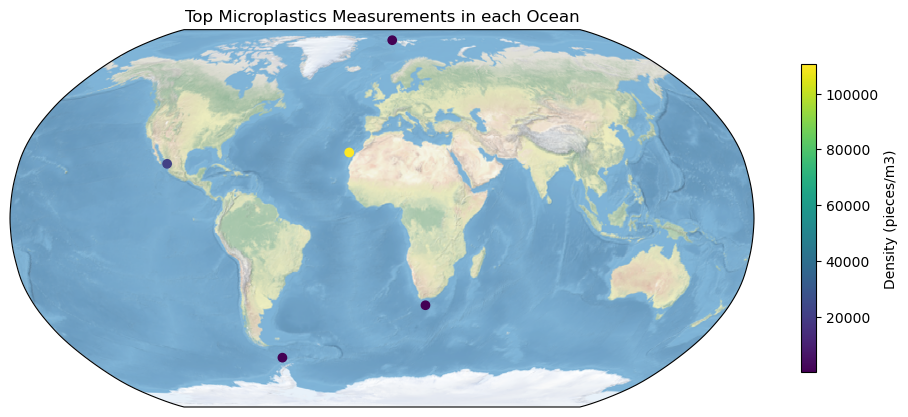

In [28]:
# Here all the highest recorded measurements in each ocean are plotted onto a map to provide some visual representation of the data points.

fig = plt.figure(figsize=(12, 8))

ax = plt.axes(projection = ccrs.Robinson())
ax.stock_img()

plt.scatter(max_measurements_df['Longitude'], max_measurements_df['Latitude'], transform=ccrs.PlateCarree(), c=max_measurements_df['Measurement'])

plt.colorbar(label='Density (pieces/m3)', shrink=0.5)
plt.title('Top Microplastics Measurements in each Ocean')

### 5. Aggregating Data to Compute Daily and Yearly Totals and Averages
Purpose: These graphs provide a time-series analysis of how the total microplastic measurements have changed over time.


Process: 


First, a new dataframe, df2, was created using the same data (to avoid any issues that may affect the plots/maps made above).

Next, the daily and the yearly sum and means of the data were calculated accordingly by forming the daily and yearly aggregated subset data. The "resample('D')", "resample('Y')", and "agg()" functions were used.

Finally, new subset datas of the yearly and daily sum/total were created and plotted onto .graph.

In [29]:
df2 = pd.read_csv('/home/an691/rcaes/final_project_AmulyaNagella/MarineMicroplastics_2000-22.csv', parse_dates=['Date'])
df2.set_index('Date', inplace=True)
df2

/tmp/ipykernel_48055/2908814936.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2 = pd.read_csv('/home/an691/rcaes/final_project_AmulyaNagella/MarineMicroplastics_2000-22.csv', parse_dates=['Date'])


,FID,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,Density Class,...,Sediment Sample Depth (m),Transect Number,Sampling Point on Beach,Volunteers Number,Collecting Time (min),State,Country,Marine Setting,x,y
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-22,96165,-29.948200,-20.712000,Atlantic Ocean,NaN,NaN,1.084698,pieces/m3,1-10,High,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-2.305649e+06,-3.496893e+06
2007-05-18,91256,3.480000,-143.620000,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,Very Low,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.598771e+07,3.876302e+05
2012-11-17,93248,4.410000,-145.740000,Pacific Ocean,NaN,NaN,0.001596,pieces/m3,0.0005-0.005,Low,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.622370e+07,4.914044e+05
2018-10-20,97754,3.652681,-49.193139,Atlantic Ocean,NaN,NaN,703.000000,pieces/m3,>=10,Very High,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-5.476155e+06,4.068903e+05
2002-03-21,92513,20.570000,-155.540000,Pacific Ocean,NaN,NaN,0.002160,pieces/m3,0.0005-0.005,Low,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.731463e+07,2.340679e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-07-06,90568,34.560000,-66.130000,Atlantic Ocean,NaN,NaN,0.030236,pieces/m3,0.005-1,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-7.361558e+06,4.104247e+06
2015-07-14,92993,73.626500,-81.362900,Arctic Ocean,Northwestern Passages,NaN,0.030000,pieces/m3,0.005-1,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-9.057277e+06,1.236639e+07
2007-02-18,88759,25.630000,-76.980000,Atlantic Ocean,NaN,NaN,0.021600,pieces/m3,0.005-1,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.569374e+06,2.953327e+06


In [30]:
# Calculating the sum and mean for each day in the dataframe.

daily_aggregated = df2.resample('D').agg({'Measurement': ['sum', 'mean']})

# Reset the index to have the 'date' as a regular column
daily_aggregated.reset_index(inplace=True)

daily_aggregated

Date Measurement          
                        sum      mean
0    2000-01-05    0.004320  0.004320
1    2000-01-06    0.004320  0.001080
2    2000-01-07    0.000000       NaN
3    2000-01-08    0.000000       NaN
4    2000-01-09    0.000000       NaN
...         ...         ...       ...
8361 2022-11-26    0.000000       NaN
8362 2022-11-27    0.000000       NaN
8363 2022-11-28    0.000000       NaN
8364 2022-11-29    0.000000       NaN
8365 2022-11-30    0.631212  0.126242

[8366 rows x 3 columns]

In [31]:
# Calculating the sum and mean for each month in the dataframe.

monthly_aggregated = df2.resample('M').agg({'Measurement': ['sum', 'mean']})

monthly_aggregated.reset_index(inplace=True)

monthly_aggregated

Date Measurement          
                       sum      mean
0   2000-01-31    0.008640  0.001728
1   2000-02-29    0.708060  0.017270
2   2000-03-31    0.409456  0.010775
3   2000-04-30    2.667620  0.037050
4   2000-05-31    0.991988  0.031000
..         ...         ...       ...
270 2022-07-31    0.000000       NaN
271 2022-08-31    0.000000       NaN
272 2022-09-30    0.000000       NaN
273 2022-10-31    0.120308  0.060154
274 2022-11-30    0.631212  0.126242

[275 rows x 3 columns]

In [32]:
# Calculating the sum and mean for each year in the dataframe.

yearly_aggregated = df2.resample('Y').agg({'Measurement': ['sum', 'mean']})

yearly_aggregated.reset_index(inplace=True)

yearly_aggregated

Date   Measurement             
                        sum         mean
0  2000-12-31  1.786573e+01     0.040148
1  2001-12-31  1.298608e+01     0.027397
2  2002-12-31  1.037851e+01     0.023270
3  2003-12-31  7.716152e+00     0.018416
4  2004-12-31  1.384142e+01     0.034517
5  2005-12-31  2.869468e+01     0.058323
6  2006-12-31  1.275105e+01     0.037614
7  2007-12-31  3.886128e+01     0.087723
8  2008-12-31  8.748896e+01     0.198839
9  2009-12-31  6.219669e+02     1.480874
10 2010-12-31  1.345566e+02     0.439727
11 2011-12-31  1.392898e+02     0.286604
12 2012-12-31  1.946897e+02     0.591762
13 2013-12-31  4.357251e+02     1.507699
14 2014-12-31  9.679680e+02     0.917505
15 2015-12-31  1.888147e+03     1.727491
16 2016-12-31  1.651755e+03     3.989747
17 2017-12-31  5.425430e+03    15.590317
18 2018-12-31  7.872774e+05   960.094334
19 2019-12-31  1.277849e+06  2452.684379
20 2020-12-31  5.618139e+04   197.127685
21 2021-12-31  5.595717e+04   186.523902
22 2022-12-31  2.677276e+00     0.051486

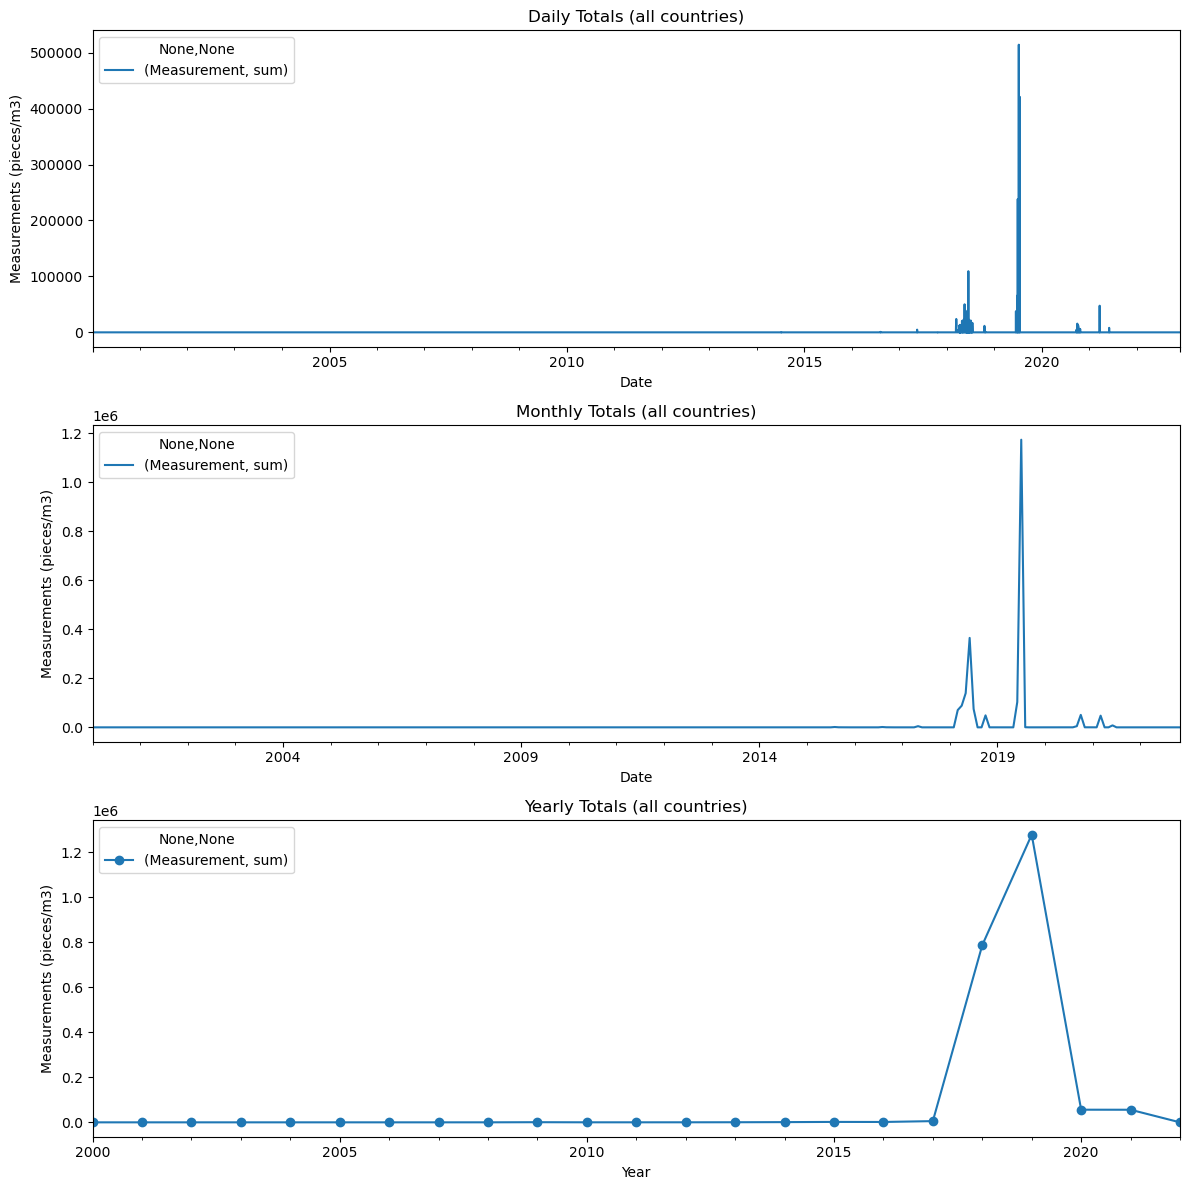

In [33]:
# Now, we are just calculating the yearly and daily sums and setting them equal to a seperate yearly and daily total subset dataframes.
daily_total = df2.resample('D').agg({'Measurement': ['sum']})
monthly_total = df2.resample('M').agg({'Measurement': ['sum']})
yearly_total = df2.resample('Y').agg({'Measurement': ['sum']})

# Plot the daily and yearly data side by side
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

# Plot the daily data
daily_total.plot(ax=axes[0], kind='line', title='Daily Totals (all countries)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Measurements (pieces/m3)')

# Plot the Monthly data
monthly_total.plot(ax=axes[1], kind='line', title='Monthly Totals (all countries)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Measurements (pieces/m3)')

# Plot the yearly data
yearly_total.plot(ax=axes[2], kind='line', marker='o', title='Yearly Totals (all countries)')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Measurements (pieces/m3)')

plt.tight_layout()
plt.show()

Comment on the above figure:

Most of the data for each country is only classified within a specific "density range" or "density class". There are a lot of blank cells or "NaN" values for the measurements of these records. Only some countries in certain years have recorded specific measurements in pieces/m3 units while the rest have just classified their records according to specific ranges or density classes. 

Although the mapping of these density clsses was helpful, it can't be used for a time-series analysis as the above figure. Categorical or range data values are too repetitive within the dataset and not useful for plotting time-series line graphs.

Since only some countries or organizations have recorded the specific measurements (in pieces/m3), the trend in the lines of the daily, monthly, and yearly graphs as shown above is heavily skewed. 

### 6. Total and Average Microplastic Measurements by Country

Purpose: These graphs can help identify which country has the highest microplastic polution since the start of the 21st century (since the year 2000).

Process: 
The code below calculates and populates the sum and mean microplastic measurements by country. Both the mean and sums by countries were plotted into a bar graph. The log-scale bar graphs of the mean and sum were also plotted to allow for a better data representation (in frequency and variance). 

First, individual sum and mean subset dataframes are created and computed accordingly. Then, the regular and log scals of both dataframes were plotted into a bar graph.

In [34]:
# Using the groupby and sum functions, the total microplastic concentrations by each country is calculated.

country_sum = df.groupby('Country')['Measurement'].sum()
country_sum

Country
Bahamas                 0.000000e+00
Brazil                  0.000000e+00
Canada                  0.000000e+00
Chile                   0.000000e+00
Colombia                0.000000e+00
Costa Rica              0.000000e+00
Dominican Republic      0.000000e+00
Equatorial Guinea       0.000000e+00
France                  0.000000e+00
Greece                  0.000000e+00
Guatemala               0.000000e+00
Kenya                   0.000000e+00
Mexico                  6.664970e+05
Spain                   1.276640e+06
Trinidad                1.044444e+01
USA                     1.111691e+05
United Arab Emirates    0.000000e+00
United Kingdom          0.000000e+00
United States           0.000000e+00
Name: Measurement, dtype: float64

In [35]:
# Using the groupby and mean functions, the average microplastic concentrations by each country is calculated.

country_mean = df.groupby('Country')['Measurement'].mean()
country_mean

Country
Bahamas                          NaN
Brazil                           NaN
Canada                           NaN
Chile                            NaN
Colombia                         NaN
Costa Rica                       NaN
Dominican Republic               NaN
Equatorial Guinea                NaN
France                           NaN
Greece                           NaN
Guatemala                        NaN
Kenya                            NaN
Mexico                   1801.343135
Spain                   25532.800000
Trinidad                    0.580247
USA                      1339.386867
United Arab Emirates             NaN
United Kingdom                   NaN
United States                    NaN
Name: Measurement, dtype: float64

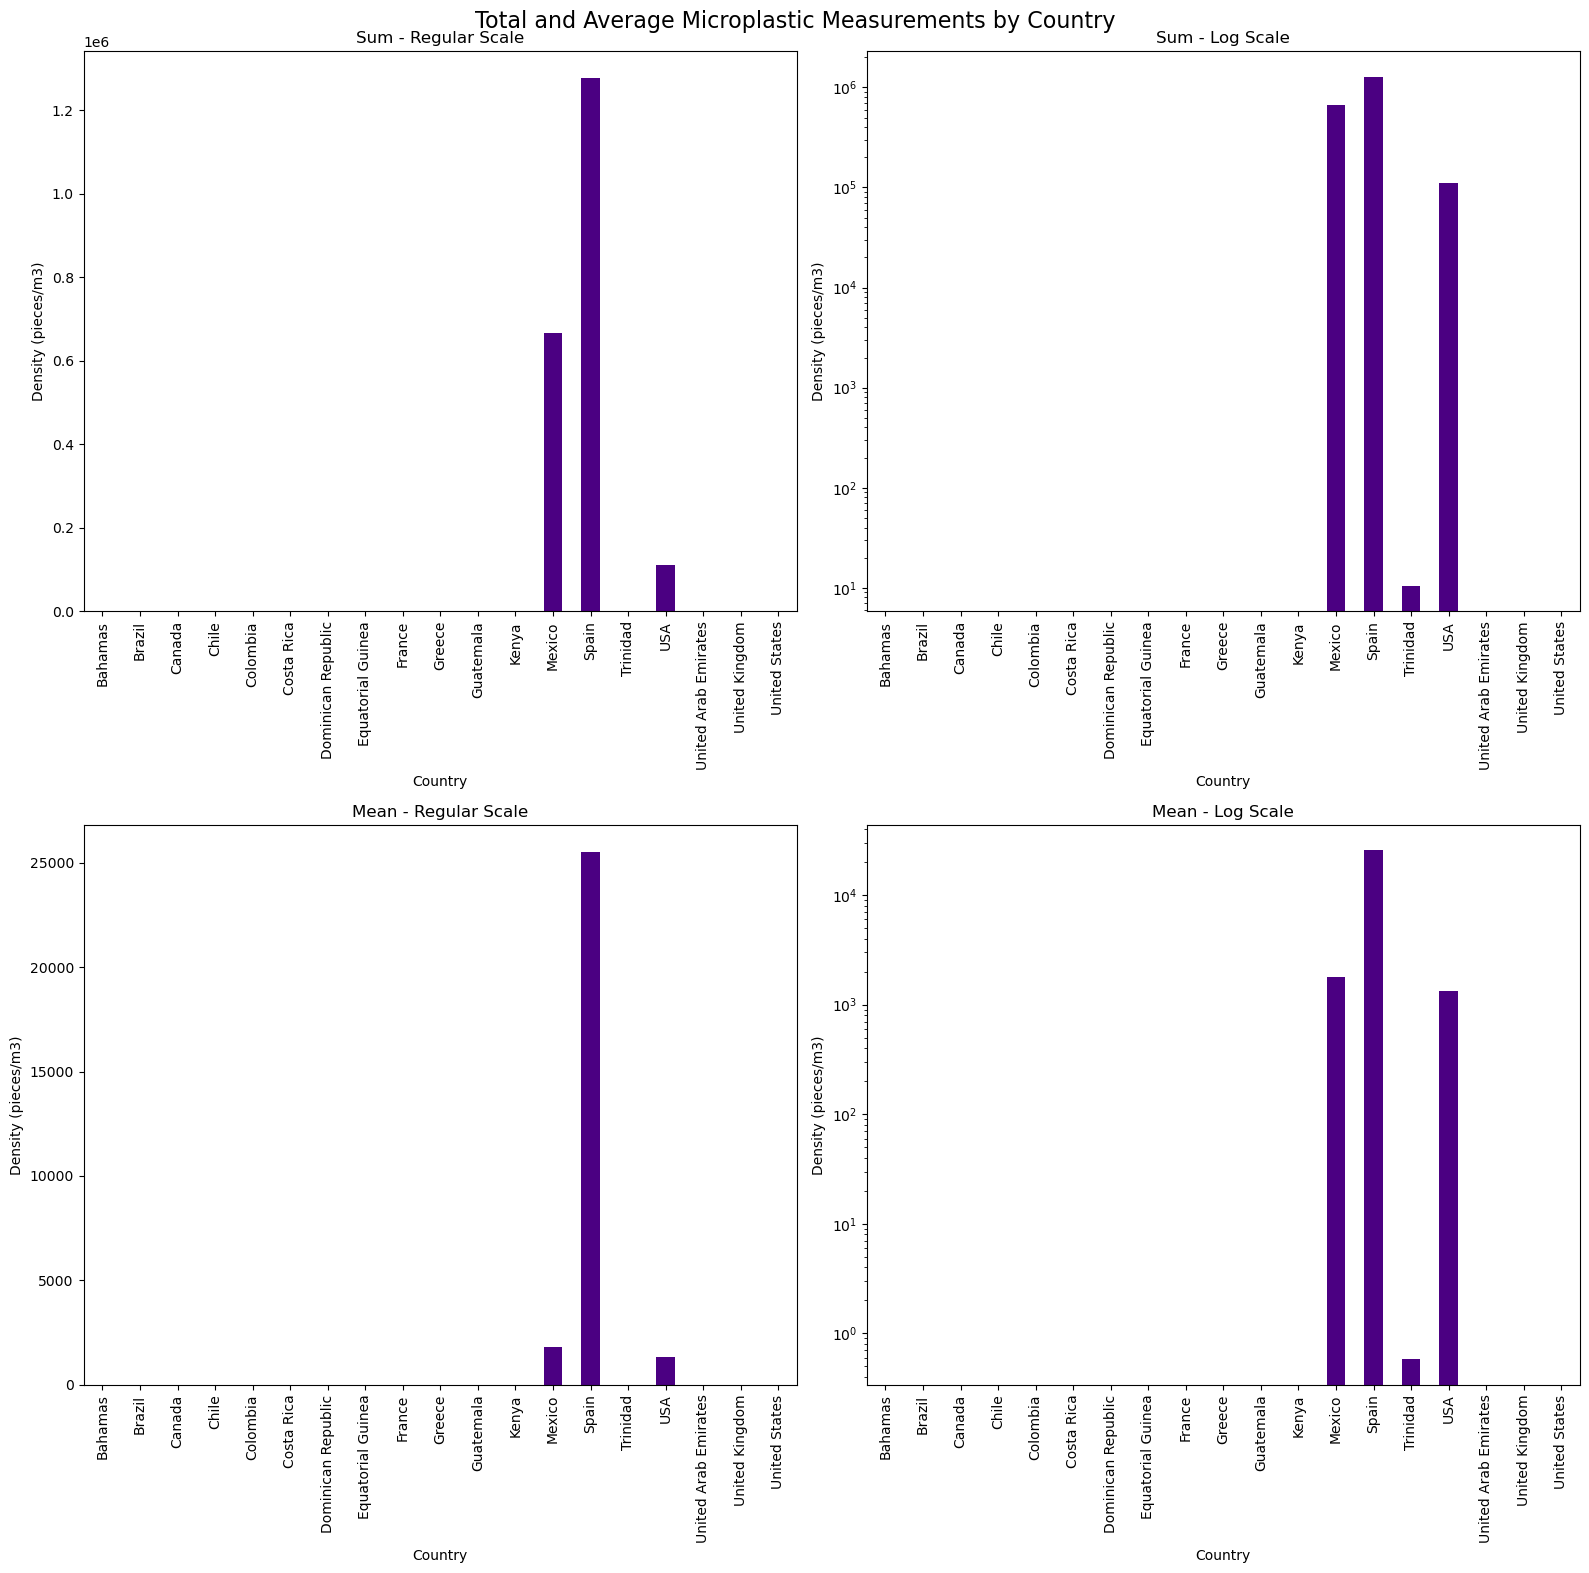

In [36]:
# Now the total and average microplastic measurements by each country in the dataset is plotted onto bar graphs. 
# The log scale of the total and average graphs are also plotted into seperate bar graphs to provide for a better representation of the dataset.

# Create a subplot with two columns
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Sum Regular plot
country_sum.plot(kind='bar', color='indigo', ax=axes[0,0])
axes[0,0].set_title('Sum - Regular Scale')
axes[0,0].set_xlabel('Country')
axes[0,0].set_ylabel('Density (pieces/m3)')

# Sum Log plot
country_sum.plot(kind='bar', color='indigo', log=True, ax=axes[0,1])
axes[0,1].set_title('Sum - Log Scale')
axes[0,1].set_xlabel('Country')
axes[0,1].set_ylabel('Density (pieces/m3)')

# Mean Regular plot
country_mean.plot(kind='bar', color='indigo', ax=axes[1,0])
axes[1,0].set_title('Mean - Regular Scale')
axes[1,0].set_xlabel('Country')
axes[1,0].set_ylabel('Density (pieces/m3)')

# Mean Log plot
country_mean.plot(kind='bar', color='indigo', log=True, ax=axes[1,1])
axes[1,1].set_title('Mean - Log Scale')
axes[1,1].set_xlabel('Country')
axes[1,1].set_ylabel('Density (pieces/m3)')

fig.suptitle('Total and Average Microplastic Measurements by Country', fontsize=16)

# Adjust layout to prevent overlapping and display the plot.
plt.tight_layout()
plt.show()

### 7. Time-Series Analysis by Country

Purpose: This analysis can also help to identify countries with the highest or lowest microplastic pollution. It could possibly help to identify any specific events that may have influenced a sudden increase or decrease in microplastic measurements within that area. Furthermore, can be helpful in developing environmental regulation specific to microplastic pollution.


Process:

First, a new dataframe, df3, was created using the same data (to avoid any issues that may affect the plots/maps made above).

From previous analysis (totals by country), it was indicated that specific microplastics measurements were recorded only for the following countries in the past decade: mexico, spain, trinidad, and usa.

Therefore, next, seperate sub-dataframes for each of the four countries was created. The yearly sums for each of the country's subset dataframes were also computed and populated into another sub-dataframe.

Finally, the yearly sums of the four countries were plotted into a line graph and a pie chart over time in years.

In [37]:
df3 = pd.read_csv('/home/an691/rcaes/final_project_AmulyaNagella/MarineMicroplastics_2000-22.csv', parse_dates=['Date'])
df3

/tmp/ipykernel_48055/1117309668.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3 = pd.read_csv('/home/an691/rcaes/final_project_AmulyaNagella/MarineMicroplastics_2000-22.csv', parse_dates=['Date'])


,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Sediment Sample Depth (m),Transect Number,Sampling Point on Beach,Volunteers Number,Collecting Time (min),State,Country,Marine Setting,x,y
0,96165,2011-01-22,-29.948200,-20.712000,Atlantic Ocean,NaN,NaN,1.084698,pieces/m3,1-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-2.305649e+06,-3.496893e+06
1,91256,2007-05-18,3.480000,-143.620000,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.598771e+07,3.876302e+05
2,93248,2012-11-17,4.410000,-145.740000,Pacific Ocean,NaN,NaN,0.001596,pieces/m3,0.0005-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.622370e+07,4.914044e+05
3,97754,2018-10-20,3.652681,-49.193139,Atlantic Ocean,NaN,NaN,703.000000,pieces/m3,>=10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-5.476155e+06,4.068903e+05
4,92513,2002-03-21,20.570000,-155.540000,Pacific Ocean,NaN,NaN,0.002160,pieces/m3,0.0005-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.731463e+07,2.340679e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16425,90568,2001-07-06,34.560000,-66.130000,Atlantic Ocean,NaN,NaN,0.030236,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-7.361558e+06,4.104247e+06
16426,92993,2015-07-14,73.626500,-81.362900,Arctic Ocean,Northwestern Passages,NaN,0.030000,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-9.057277e+06,1.236639e+07
16427,88759,2007-02-18,25.630000,-76.980000,Atlantic Ocean,NaN,NaN,0.021600,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.569374e+06,2.953327e+06
16428,104245,2021-06-05,29.655200,-95.007800,Atlantic Ocean,Gulf of Mexico,NaN,NaN,pieces/10 mins,40-200,...,NaN,NaN,NaN,4.0,10.0,Texas,United States,Beach-Nurdle Patrol,-1.057622e+07,3.459306e+06


In [38]:
df_mexico = df3[df3['Country'] == 'Mexico'][['Date', 'Measurement', 'Country', 'Density Range', 'Density Class']]

df_mexico['Year'] = df_mexico['Date'].dt.year
df_mexico_yearly_sum = df_mexico.groupby(['Year', 'Country'])['Measurement'].sum()
df_mexico_yearly_sum

Year  Country
2018  Mexico     666496.959848
2019  Mexico          0.000000
2020  Mexico          0.000000
2021  Mexico          0.000000
2022  Mexico          0.000000
Name: Measurement, dtype: float64

In [39]:
df_spain = df[df['Country'] == 'Spain'][['Date', 'Measurement', 'Country', 'Density Range', 'Density Class']]

df_spain['Year'] = df_spain['Date'].dt.year
df_spain_yearly_sum = df_spain.groupby(['Year', 'Country'])['Measurement'].sum()
df_spain_yearly_sum

Year  Country
2019  Spain      1276640.0
Name: Measurement, dtype: float64

In [40]:
df_trinidad = df[df['Country'] == 'Trinidad'][['Date', 'Measurement', 'Country', 'Density Range', 'Density Class']]

df_trinidad['Year'] = df_trinidad['Date'].dt.year
df_trinidad_yearly_sum = df_trinidad.groupby(['Year', 'Country'])['Measurement'].sum()
df_trinidad_yearly_sum

Year  Country 
2015  Trinidad    4.444445
2016  Trinidad    6.000000
Name: Measurement, dtype: float64

In [41]:
df_usa = df[df['Country'] == 'USA'][['Date', 'Measurement', 'Country', 'Density Range', 'Density Class']]

df_usa['Year'] = df_usa['Date'].dt.year
df_usa_yearly_sum = df_usa.groupby(['Year', 'Country'])['Measurement'].sum()
df_usa_yearly_sum

Year  Country
2020  USA        55547.11
2021  USA        55622.00
Name: Measurement, dtype: float64

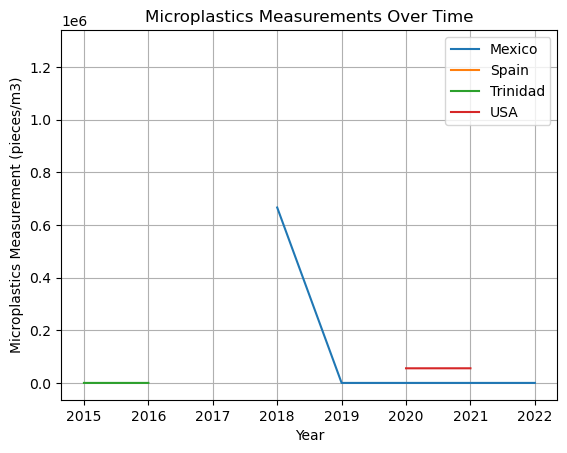

In [42]:
# Plot each country's data
for i, country_df in enumerate([df_mexico_yearly_sum, df_spain_yearly_sum, df_trinidad_yearly_sum, df_usa_yearly_sum]):
    country = country_df.index.get_level_values('Country')[0]  # Get the country name from the index
    plt.plot(country_df.index.get_level_values('Year'), country_df.values, label=country)

# Customize the plot
plt.title('Microplastics Measurements Over Time')
plt.xlabel('Year')
plt.ylabel('Microplastics Measurement (pieces/m3)')
plt.legend()
plt.grid(True)
plt.show()

Comment of plot results:

There is a lot of missing data within the dataframe for all the countries. Therefore, this graph is not a good representation of a time-series analysis for all the countries.

### 8. Microplastics Distribution by Countries with Detected Measurements

Purpose: Of the four countries with recorded microplastic measurements, they only have records for specific years from 2015 to 2022. This inconsistent data is quite unhelpful for a time-series analysis (as shown in previous line graph). For a more effective use of the recorded measurements, this pie graph indicates which country has a significantly higher role in microplastic pollution by calculating the total sums of each country's measurements data. 


Process:

Using the mexico, spain, trinidad, and usa subset datframes created in the previous section ("Time-Series Analysis"), total microplastics measurements from 2000-2022 within the data are calculated. It is then populated into its own subset dataframe with the according totals for each country. Finally, the totals for the four countries are plotted into a pie chart.


Next, the count of the different density class categories within each of the four country subset dataframes were calculated and graphed into individual pie charts.

In [43]:
total_sum_mexico = df_mexico['Measurement'].sum()
total_sum_spain = df_spain['Measurement'].sum()
total_sum_trinidad = df_trinidad['Measurement'].sum()
total_sum_usa = df_usa['Measurement'].sum()

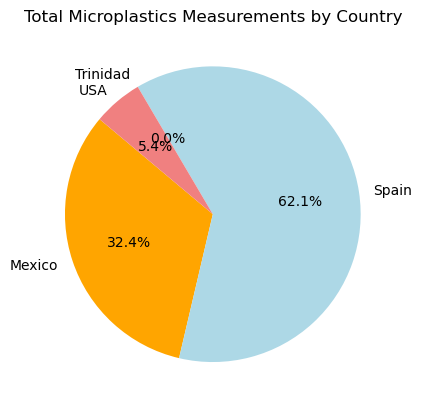

In [44]:
labels = ['Mexico', 'Spain', 'Trinidad', 'USA']
sizes = [total_sum_mexico, total_sum_spain, total_sum_trinidad, total_sum_usa]
colors = ['orange', 'lightblue', 'lightgreen', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total Microplastics Measurements by Country')
plt.show()

Comment of the Pie Chart:

This chart is a better representation of the total microplastics measurement records from the four countries than compared to the line graph in the prevoius section. These are the only countries that have measurement data from the past 2 decades, most of the other countries only recorded density ranges and density classes.

The chart indictes trinidad as 0% even through it has a total microplastic measurement of 10.4 pieces/m3, it is just significantly lower than the other countries' totals.

In [45]:
df_mexico_counts = df_mexico['Density Class'].value_counts()
df_spain_counts = df_spain['Density Class'].value_counts()
df_trinidad_counts = df_trinidad['Density Class'].value_counts()
df_usa_counts = df_usa['Density Class'].value_counts()

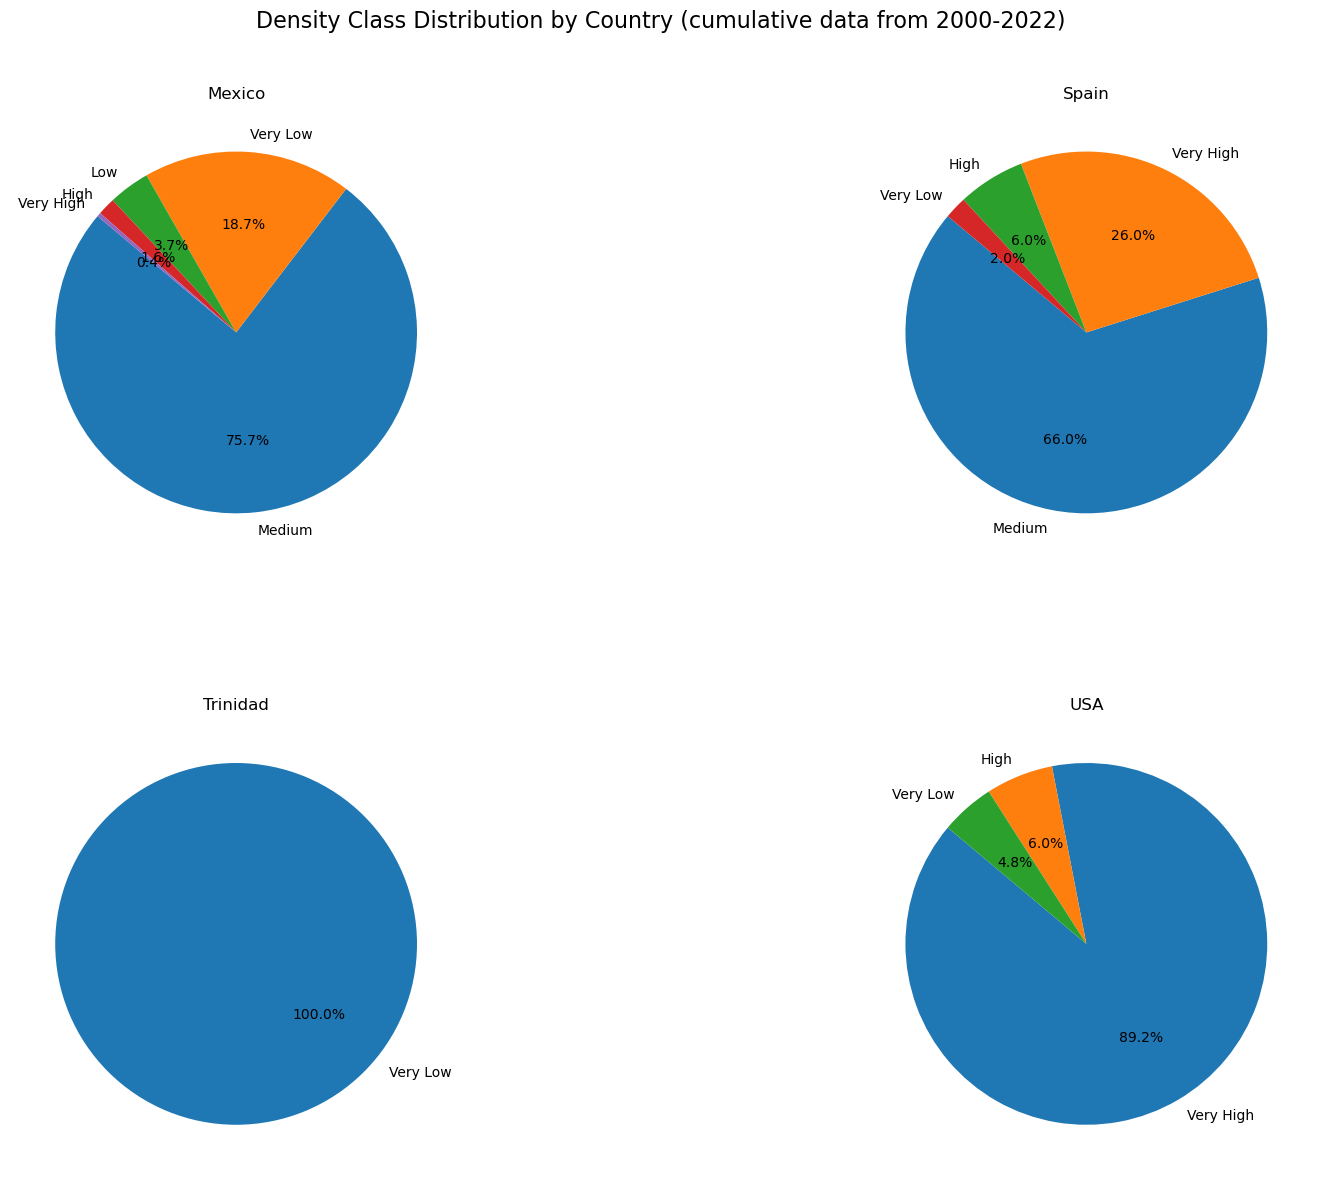

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Density Class Distribution by Country (cumulative data from 2000-2022)', fontsize=16)

# Plot pie charts for each subset DataFrame
axes[0, 0].pie(df_mexico_counts, labels=df_mexico_counts.index, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Mexico')

axes[0, 1].pie(df_spain_counts, labels=df_spain_counts.index, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Spain')

axes[1, 0].pie(df_trinidad_counts, labels=df_trinidad_counts.index, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Trinidad')

axes[1, 1].pie(df_usa_counts, labels=df_usa_counts.index, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('USA')

plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=10)  # Adjust subplot layout and add title without overlapping
plt.show()

Comment of the Pie Chart:

These charts indicate the distribution of the total density range records of microplastics from 2000 to 2022 for each of the four countries.

### 9. Density Class Distribution by Country

Purpose: These pie charts provide a diffrent perspective into the analysis of which country or countries had the highest microplastic pollution. Since only 4 countries (Mexico, Spain, Trinidad, and USA) have specifc "Measurements" of microplastic concentrations, we are unable to see exactly how all the countries' microplastic concentrations are distributed. However, all the rows within the dataset for all countries have classified the density of microplastics (as very low, low, medium, high, and very high). Therefore, these bar graphs are a better representation of microplastic pollution by country.


Process:

First, a new dataframe, df4, was created using the same data (to avoid any issues that may affect the plots/maps made above).

We already know that there are five main microplastic density record classifications within the dataset: very low, low, medium, high, and very high. So next, the count of each of the classifications were computed for each country listed in the dataset. These counts were populated into a subset dataset called "category_counts_by_country".

Finally, bar graphs for each classification were plotted with the counts in the y-axis and the countries in the x-axis. The log scale was used to provide a better representation of the counts since the magnitude of the counts were largely varied.

In [47]:
df4 = pd.read_csv('/home/an691/rcaes/final_project_AmulyaNagella/MarineMicroplastics_2000-22.csv', parse_dates=['Date'])

/tmp/ipykernel_48055/3448653831.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df4 = pd.read_csv('/home/an691/rcaes/final_project_AmulyaNagella/MarineMicroplastics_2000-22.csv', parse_dates=['Date'])


In [48]:
# Calculate counts for each category within each country
category_counts_by_country = df4.groupby(['Country', 'Density Class']).size().unstack(fill_value=0)

category_counts_by_country

Density Class,High,Low,Medium,Very High,Very Low
Country,,,,,
Bahamas,0,0,0,0,1
Brazil,1,0,1,0,0
Canada,4,2,14,0,0
Chile,0,0,2,0,0
Colombia,0,1,0,0,0
Costa Rica,3,0,5,0,0
Dominican Republic,0,0,1,0,0
Equatorial Guinea,0,0,0,0,1
France,0,1,0,0,0


/tmp/ipykernel_48055/1716128399.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_counts_by_country.index, rotation=45, ha='right') #Adjusting the x-axis country name labels to prevent them from overlapping
/tmp/ipykernel_48055/1716128399.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_counts_by_country.index, rotation=45, ha='right') #Adjusting the x-axis country name labels to prevent them from overlapping
/tmp/ipykernel_48055/1716128399.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(category_counts_by_country.index, rotation=45, ha='right') #Adjusting the x-axis country name labels to prevent them from overlapping
/tmp/ipykernel_48055/1716128399.py

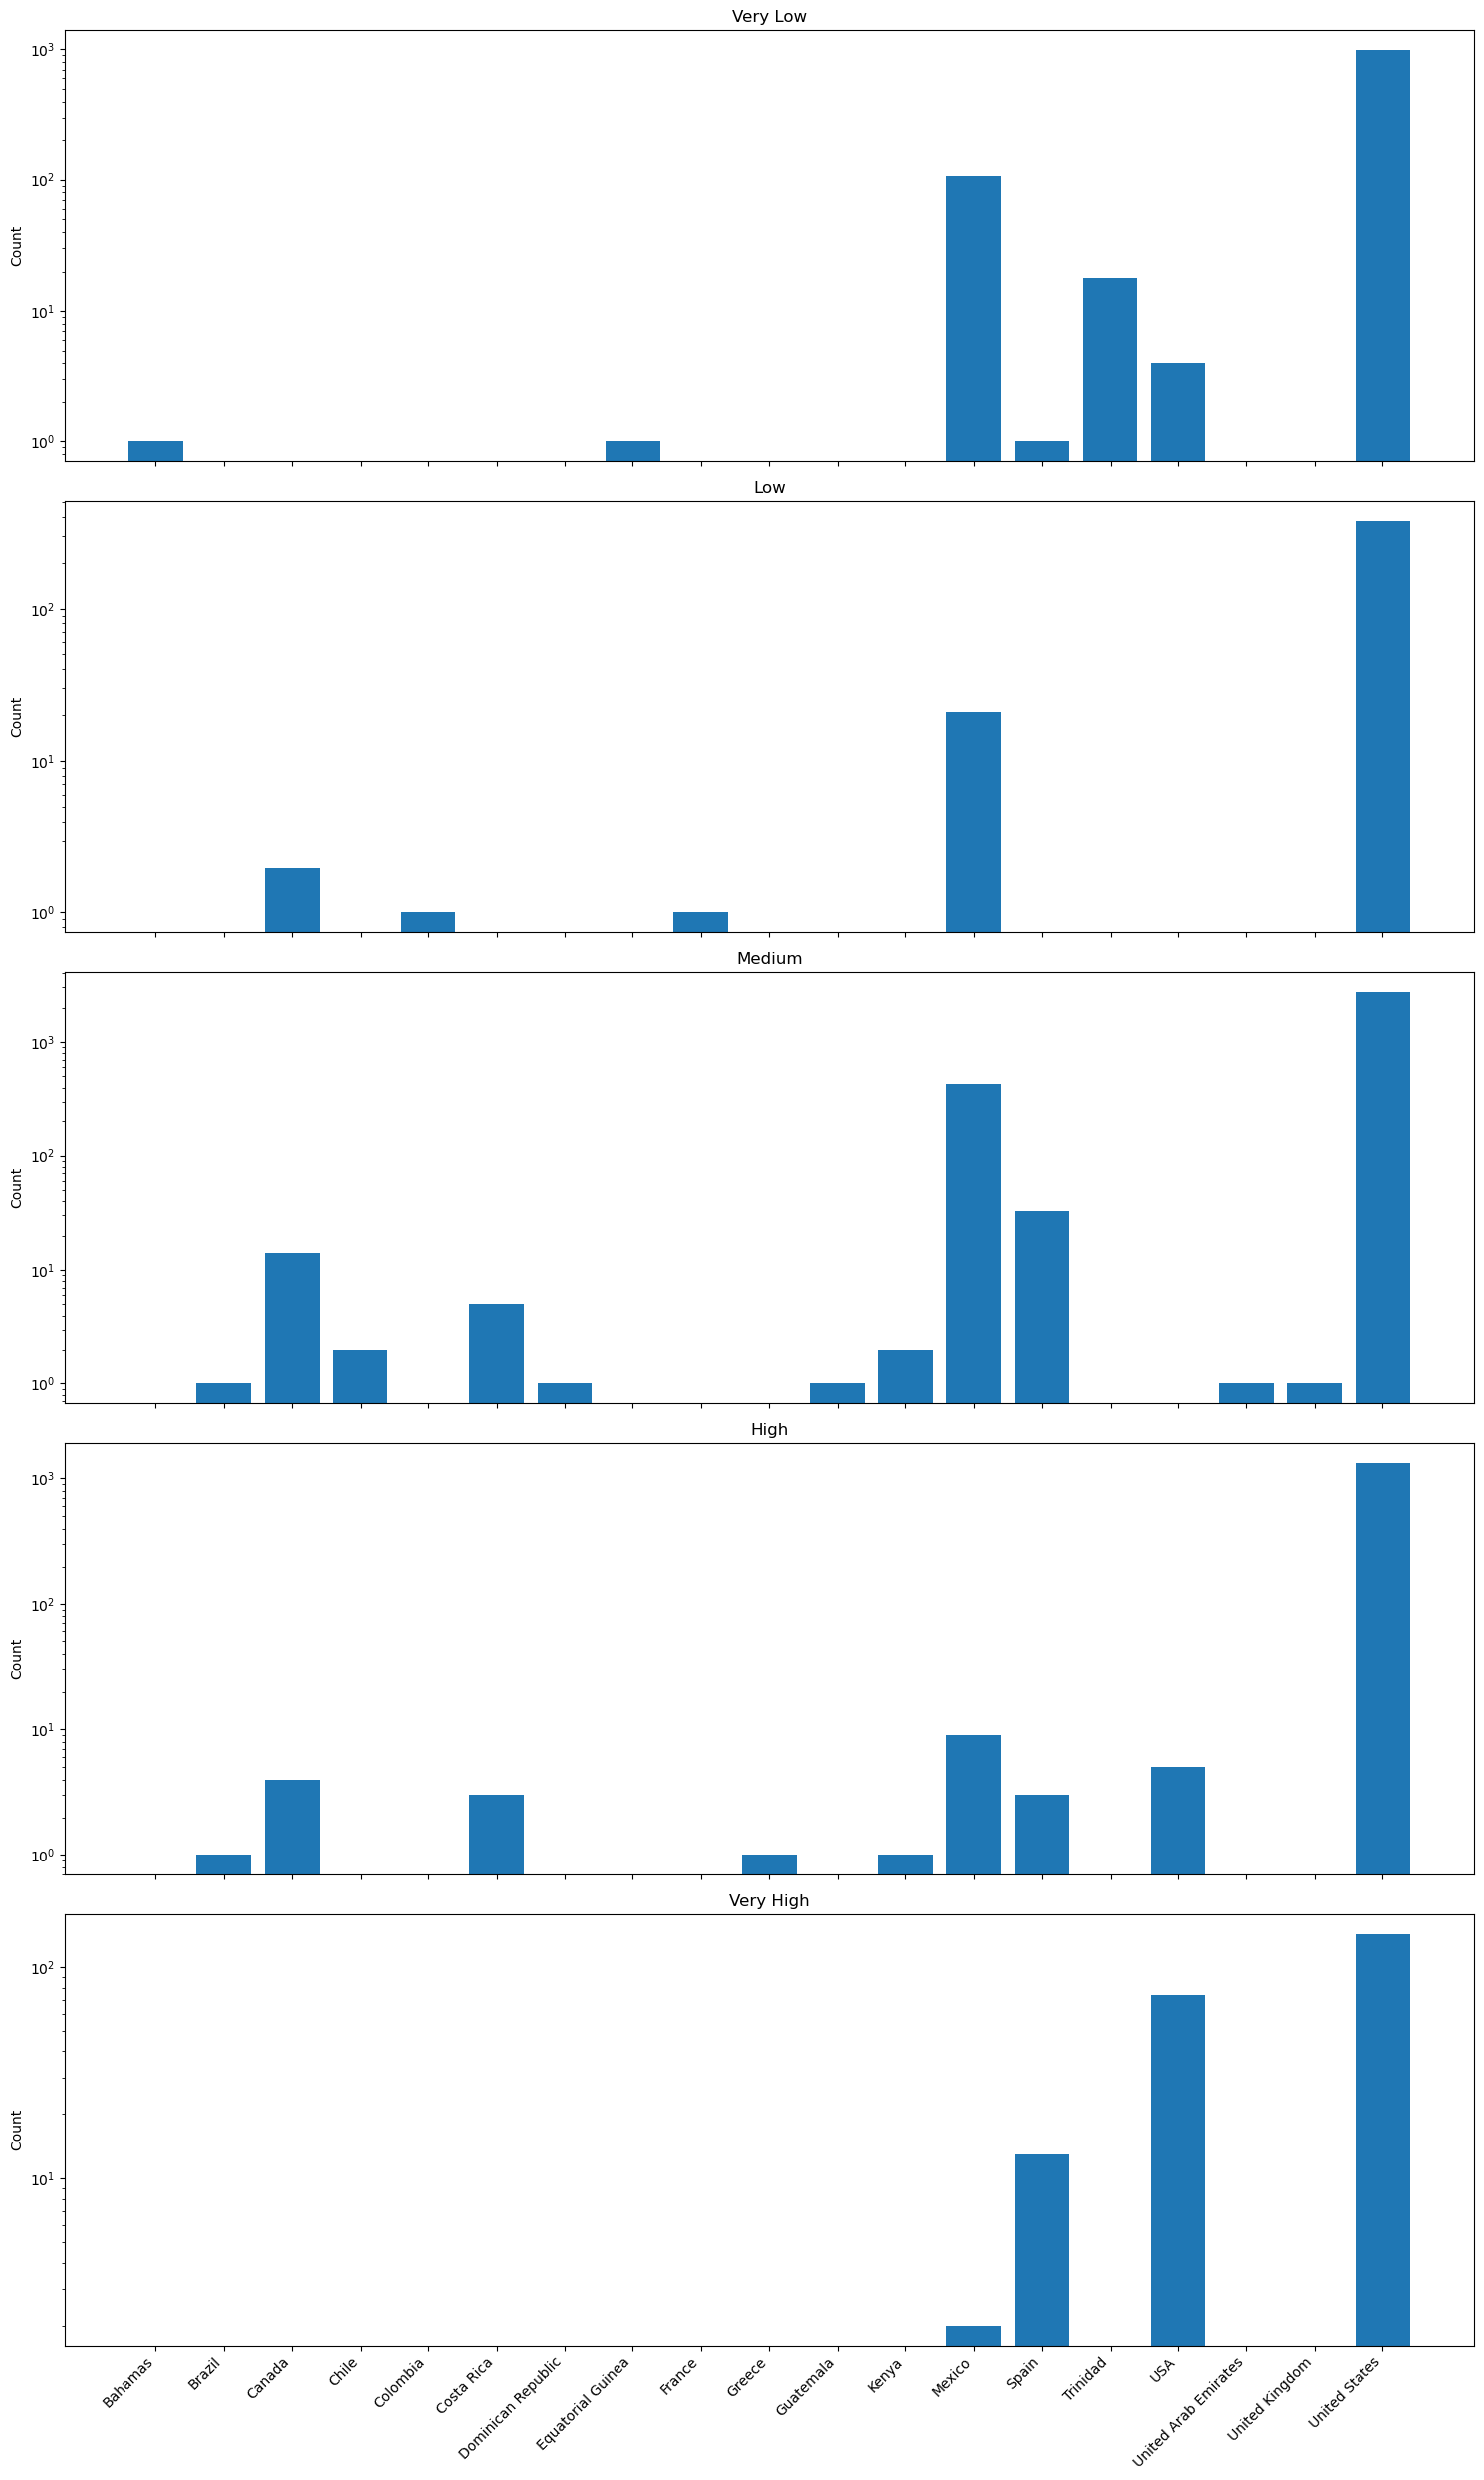

In [49]:
# Plot separate bar graphs for each category
categories = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Plotting all the categories bar graphs for all countries using a for loop. The "Sharex" function was used since all graphs use the same number of countries.
fig, axes = plt.subplots(nrows=len(categories), ncols=1, figsize=(15, 5*len(categories)), sharex=True)

for i, category in enumerate(categories):
    ax = axes[i]
    ax.bar(category_counts_by_country.index, category_counts_by_country[category], log=True) #log scale was used to get a better representation of the data counts.
    ax.set_title(category)
    ax.set_ylabel('Count')
    ax.set_xticklabels(category_counts_by_country.index, rotation=45, ha='right') #Adjusting the x-axis country name labels to prevent them from overlapping

plt.tight_layout()
plt.show()